# Power Plant Early Warning System

This is a data analysis project focused on a power-plant anomaly detection and early warning system.

This report describes the methodology that would be involved in undertaking such a project (if implemented within a realistic time frame). 

## Project Summary

"Imagine, you are a power-plant maintenance engineer.
Your task is to keep the plant up and running and detect any deviations from normal operation as early as possible in order to avoid unplanned downtime, loss of revenue and impact on the stability of the power grid.
Therefore, a typical power plant is equipped with thousands of sensors (temperatures, pressures, vibrations, ambient conditions etc.) that are continuously monitoring the condition of various components of the plant.
Attached is a data set with sensor readings over a period of 20 days. Every 15 minutes the sensors measure
Output power of the power plant
Airflow
Ambient temperature
32 temperatures at different positions in the engine
How would you analyze such kind of data and which methods and algorithms would you consider? If time permits, feel free to try out your favorite method on the data set with any tool you like, to see if something suspicious or abnormal might have occurred during those 20 days of operation.
 
Hints:
Don’t spend more than 2-3 hours on this task
There are a couple of instances where there is no power production (MW=0), however, this is not considered an anomaly or malfunction" 




## Contents

* Phase 1 
    - Data Description
    - Descriptive Statistics
    - Data Exploration

* Phase 2
    - Domain Experts
    - Data Cleaning and Validation
    
* Phase 3
    - Problem statement
    - Background (of Problem. Anomaly Detection Methods)
    - Proposed Solution
 
* Phase 4
    - Implementation
    - Results
    - Evaluation
    
* Toy early warning detection system    


## Data Description

The data description phase is an important step in order to make sure any analysis of the data is correctly interpreted. The data description phase includes producing a data dictionary.

### Data Dictionary

The data dictionary provides a description of the contents, format, and structure for the input data. This will include any definitions and the data type ie boolean, categorical etc.


Column Name | Item Name | Data type | Format | Units | Description |
------------|-----------|-----------|--------|-------|-------------|
TimeStamp   | event time   | Datetime | DD/MM/YYYY HH:MM:SS | date and time | Time the event data from the sensors was recorded every 15 minutes.
MW          | Power Output | Float    | numeric (precision up to 5 decimal places) | Mega-watts | Output power production of the power plant. Units are in mega-watts. Note: There are instances where there is no power production (MW=0), however, this is not considered an anomaly or malfunction.
Airflow            | Airflow recording | Float | numeric (precision up to 6 decimal places) | volume m^3/h (cubic metres per hour) ?? | The recorded amount of airflow. 
AmbientTemperature | Ambient Temperature recording | Float | numeric (precision up to 6 decimal places) | Degrees Celsius? | Measurement of the ambient temperature of the power plant.
Temperture1A | Sensor 1A | Float | numeric (precision up to 5dp) | Degrees Celsius? | Temperature output of sensor 1A which measures ?? 
Temperture... | ... | ... | ...


The full data descriptions and schema (relationship for multiple data sets) have been omitted due to brevity. The important aspects related to the work presented here have been included below.

The data description phase is important in order to make any trends or pattens from further analysis understandable and interpretable. 

## Descriptive Statistics

This section provides some descriptions of the data in the raw data set. The purpose is to highlight:
* record counts
* mins, max and mean of values
* checks for missing values
* check for duplicates
* detect and outliers
* identify any data cleaning

In [14]:
import pandas as pd 
import numpy as np 

# read data
df = pd.read_csv("data/PowerPlant.txt", sep='\t')

Check the the number of rows and columns

In [15]:
df.shape

(1920, 36)

Take a look at the first few items of data.

In [16]:
df.head()

,TimeStamp,MW,Airflow,AmbientTemperature,Temperture1A,Temperture1B,Temperture2A,Temperture2B,Temperture3A,Temperture3B,...,Temperture12A,Temperture12B,Temperture13A,Temperture13B,Temperture14A,Temperture14B,Temperture15A,Temperture15B,Temperture16A,Temperture16B
0,06/11/2017 00:00:00,149.51172,0.0,14.176818,569.57500,569.57500,541.24300,540.95680,548.39700,548.39700,...,570.72003,573.01020,560.81660,559.84370,584.17780,583.60490,549.54156,548.96924,562.70560,562.99180
1,06/11/2017 00:15:00,149.70703,0.0,15.164263,571.65710,570.76404,542.95230,541.02430,550.05426,550.05426,...,571.89343,574.51990,559.87195,562.21140,585.68830,585.09973,550.71460,550.14230,564.50885,563.88666
2,06/11/2017 00:30:00,148.53516,0.0,14.882936,570.64984,569.76764,542.95230,542.14060,549.92163,549.75757,...,571.79486,573.79880,559.46387,561.49054,584.68030,584.38610,550.90216,550.36110,563.78015,563.75680
3,06/11/2017 00:45:00,149.60938,0.0,14.620339,572.37524,571.49300,542.10156,541.80756,550.91000,550.41270,...,573.23410,574.65770,561.18884,562.38824,586.12036,585.04970,552.34076,550.69890,565.51320,565.04706
4,06/11/2017 01:00:00,149.36523,0.0,14.813577,570.46515,570.67320,543.15240,541.27435,549.78100,550.06710,...,572.35180,573.61414,561.14480,562.56790,585.27660,584.70380,551.69320,549.88257,563.59560,564.16800


Check the timestamp variable.

In [17]:
df['TimeStamp'].describe() 

count                    1920
unique                   1920
top       06/25/2017 22:00:00
freq                        1
Name: TimeStamp, dtype: object

Check for duplicates

In [18]:
((df['TimeStamp'].duplicated()).any() == True)

False

After checking use timestamp as index.

In [66]:
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
df.set_index(df['TimeStamp'],inplace=True)
del df['TimeStamp']
df.head()

,MW,Airflow,AmbientTemperature,Temperture1A,Temperture1B,Temperture2A,Temperture2B,Temperture3A,Temperture3B,Temperture4A,...,Temperture12A,Temperture12B,Temperture13A,Temperture13B,Temperture14A,Temperture14B,Temperture15A,Temperture15B,Temperture16A,Temperture16B
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2017-06-11 00:00:00,149.51172,0.0,14.176818,569.57500,569.57500,541.24300,540.95680,548.39700,548.39700,560.9884,...,570.72003,573.01020,560.81660,559.84370,584.17780,583.60490,549.54156,548.96924,562.70560,562.99180
2017-06-11 00:15:00,149.70703,0.0,15.164263,571.65710,570.76404,542.95230,541.02430,550.05426,550.05426,563.3641,...,571.89343,574.51990,559.87195,562.21140,585.68830,585.09973,550.71460,550.14230,564.50885,563.88666
2017-06-11 00:30:00,148.53516,0.0,14.882936,570.64984,569.76764,542.95230,542.14060,549.92163,549.75757,562.3492,...,571.79486,573.79880,559.46387,561.49054,584.68030,584.38610,550.90216,550.36110,563.78015,563.75680
2017-06-11 00:45:00,149.60938,0.0,14.620339,572.37524,571.49300,542.10156,541.80756,550.91000,550.41270,563.4940,...,573.23410,574.65770,561.18884,562.38824,586.12036,585.04970,552.34076,550.69890,565.51320,565.04706
2017-06-11 01:00:00,149.36523,0.0,14.813577,570.46515,570.67320,543.15240,541.27435,549.78100,550.06710,563.4265,...,572.35180,573.61414,561.14480,562.56790,585.27660,584.70380,551.69320,549.88257,563.59560,564.16800


Produce data descriptions (mins, max, means etc).

In [19]:
df.describe()

,MW,Airflow,AmbientTemperature,Temperture1A,Temperture1B,Temperture2A,Temperture2B,Temperture3A,Temperture3B,Temperture4A,...,Temperture12A,Temperture12B,Temperture13A,Temperture13B,Temperture14A,Temperture14B,Temperture15A,Temperture15B,Temperture16A,Temperture16B
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,133.879369,5.398385,17.494073,534.980150,534.693150,509.008011,507.782389,515.242243,514.798960,527.529844,...,531.071926,532.820370,523.069077,524.468951,548.390690,548.212686,517.151740,516.751946,530.150782,530.352699
std,38.242859,10.421131,2.609152,124.429534,124.110622,116.417838,116.319509,119.998448,120.172039,124.522066,...,131.927662,131.971690,128.986385,129.420565,134.245458,133.773888,123.065793,122.974666,124.743745,124.912457
min,0.000000,0.000000,11.445245,28.578466,25.872095,29.147110,26.106813,28.285900,26.040892,28.586680,...,23.734856,25.628904,24.989866,26.473381,25.213276,26.123314,24.978464,26.172728,24.986704,25.571476
25%,139.831543,0.000000,15.277482,566.349405,564.726675,539.112000,537.762100,545.337075,543.786680,559.176960,...,562.113978,563.995185,555.782940,557.613315,582.961243,582.986905,548.029845,548.258533,559.808697,560.403675
50%,145.361330,0.000000,17.511122,571.154475,570.937450,541.664000,540.833100,549.909305,549.762115,563.364100,...,569.730000,571.530600,560.400500,561.921920,587.545650,587.235580,552.444200,552.161020,566.445495,566.827760
75%,148.486330,7.016095,19.277029,573.270300,573.211065,543.859440,542.679490,552.345700,552.161885,565.937130,...,572.239335,574.036295,562.560837,564.279315,589.850575,589.429930,555.164558,554.660478,569.490725,569.879347
max,154.003900,37.000000,25.928612,585.689760,583.398400,563.165700,559.437300,563.930240,561.068240,576.149050,...,584.151550,584.956050,574.807800,576.525700,599.911740,599.578060,568.643100,569.850700,578.243650,578.098600


Produce histogram to show frequent of values.

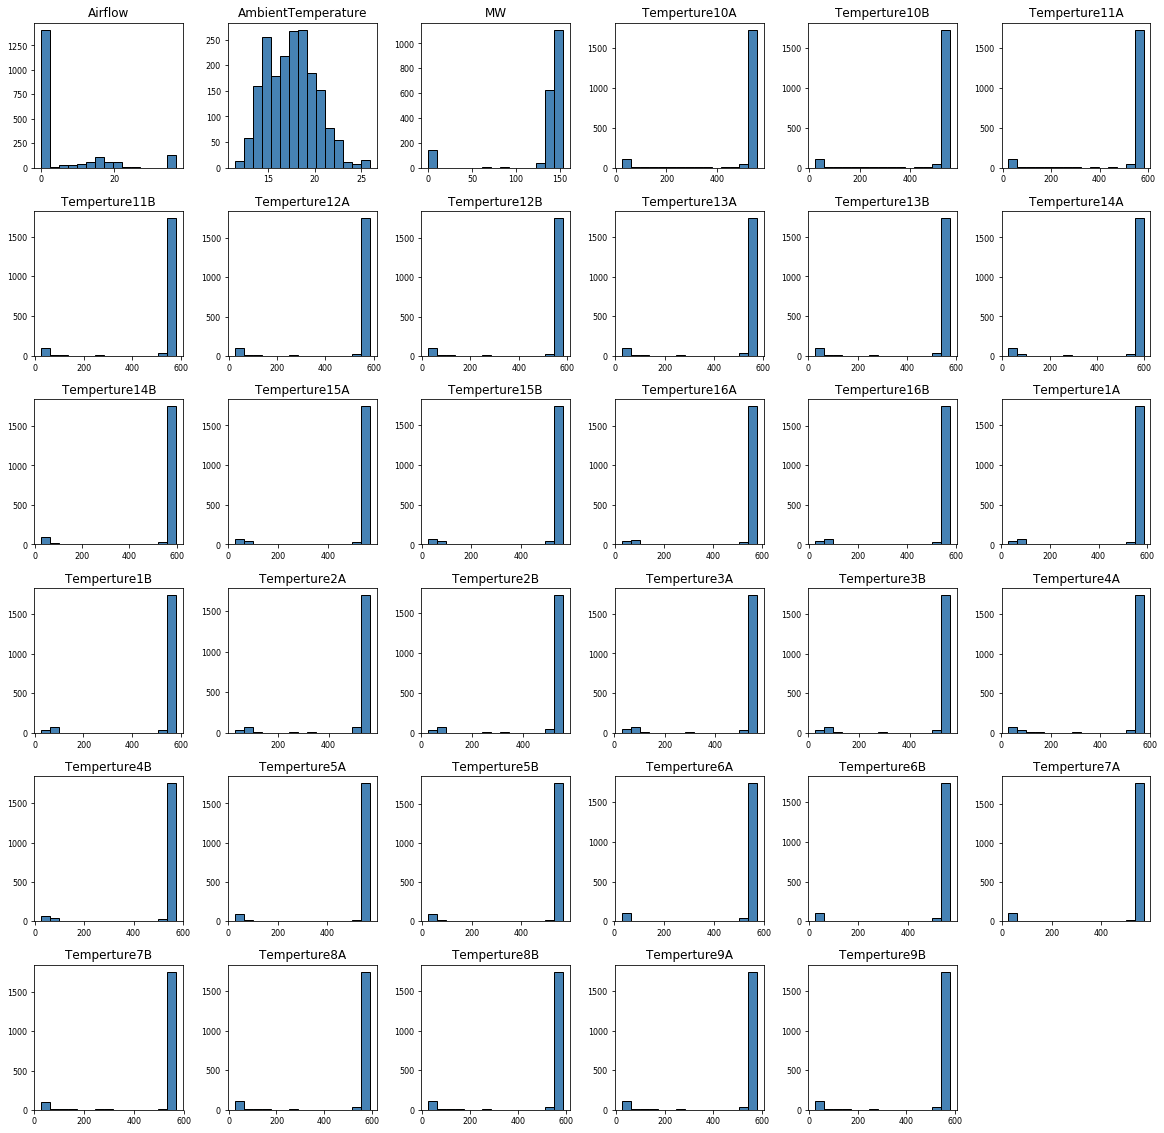

In [64]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False, figsize=(20,20))    
plt.show()

Produce overall plot of input data. Potential anomalies can be seen.

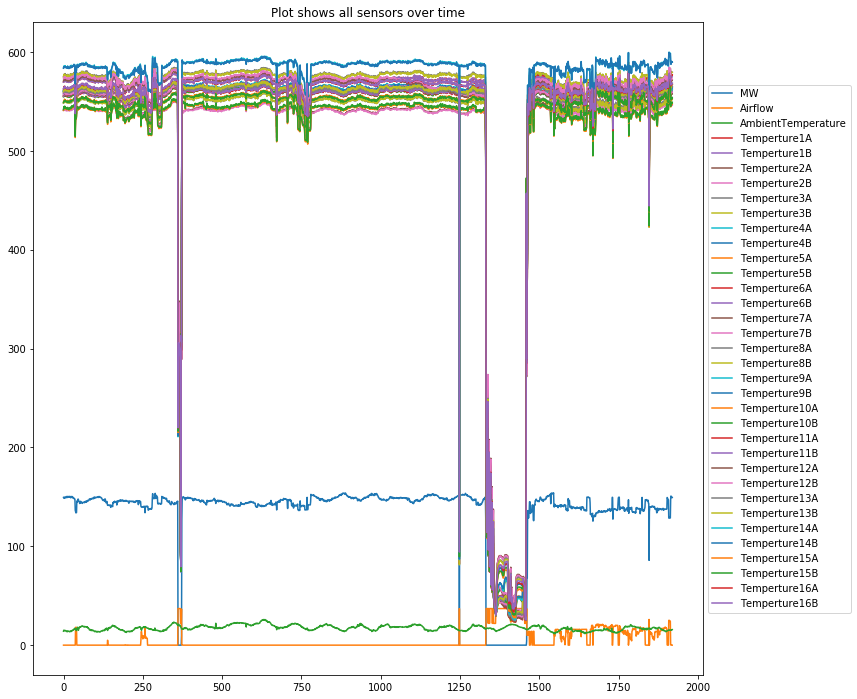

In [62]:
import matplotlib.pyplot as plt
import matplotlib.font_manager

df[df.columns].plot(figsize=(12,12))
plt.title('Plot shows all sensors over time', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## Data Exploration

Generating descriptive statistics can be thought of from a high level. This stage goes deeper.

Exploratory data analysis stage involves "Get a 'feel" for the data and note down quirks or characteristics of interest. 

* investigate quirks 
* look at variables of interest
* move the data around
* satisfy our curiosity

I am looking for inconsistencies or something weird/ interesting.

I am documenting each step and making notes. 

Investigate abnormal looking regions (See plot above)

There are 4 main points to investigate.

### 1. Large fluctuation
Event start at time point 2017-06-14 18:00:00.
we start to see a dip in MW and an increase in airflow and a gradual dip in temperature sensors and return to normal by time 2017-06-14 21:15:00

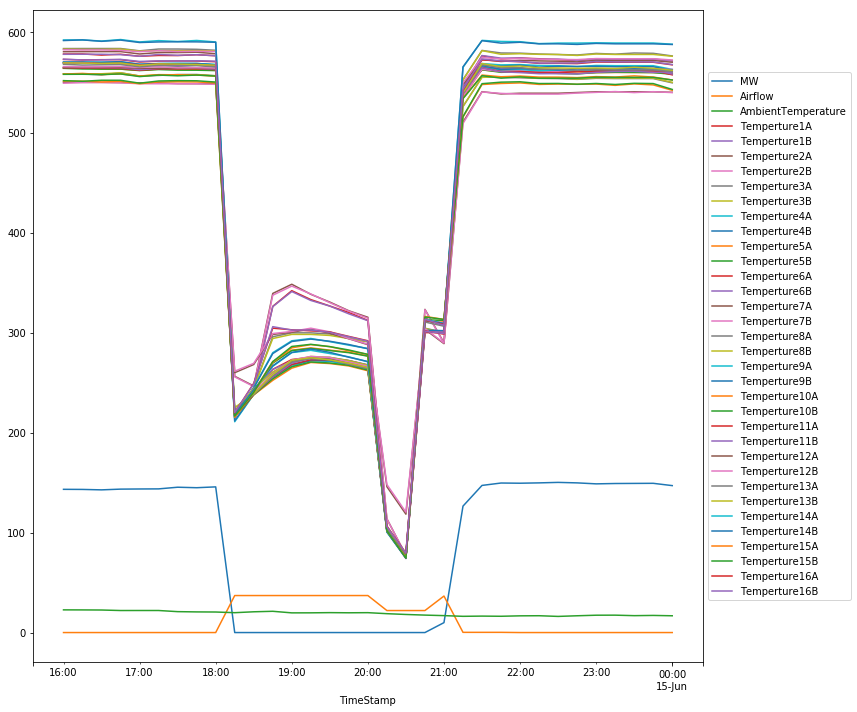

In [69]:
df['2017-06-14 16:00:00':'2017-06-15 00:00:00'].plot(figsize=(12,12))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [70]:
df['2017-06-14 18:00:00':'2017-06-15 00:00:00']

,MW,Airflow,AmbientTemperature,Temperture1A,Temperture1B,Temperture2A,Temperture2B,Temperture3A,Temperture3B,Temperture4A,...,Temperture12A,Temperture12B,Temperture13A,Temperture13B,Temperture14A,Temperture14B,Temperture15A,Temperture15B,Temperture16A,Temperture16B
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2017-06-14 18:00:00,145.654300,0.000000,20.530846,576.77313,576.77313,548.72410,548.151730,556.736630,556.736630,568.184750,...,578.777500,581.068360,565.60870,567.326050,590.52110,590.234560,556.450560,556.450560,570.76110,571.333560
2017-06-14 18:15:00,0.000000,37.000000,19.862390,220.70155,219.50287,256.25183,255.656170,217.946990,216.480680,214.705930,...,215.905490,217.104890,224.59564,224.895070,218.57922,218.303970,215.305770,216.480680,219.77805,220.077760
2017-06-14 18:30:00,0.000000,37.000000,20.756523,243.25471,242.06058,246.56973,245.981160,244.747040,244.505370,245.077880,...,239.389130,240.285130,237.87917,238.791640,242.41595,242.690120,240.285130,240.268900,249.26215,248.600920
2017-06-14 18:45:00,0.000000,37.000000,21.253326,326.15515,325.88513,339.09238,337.309500,295.799070,294.009160,279.836700,...,258.743320,258.719120,256.63504,258.147950,266.18005,266.750430,270.002870,270.910060,304.36404,305.863300
2017-06-14 19:00:00,0.000000,37.000000,19.682156,341.83400,340.97090,348.26510,346.419860,299.678700,298.113370,291.740540,...,270.991800,272.504360,270.65310,272.207460,279.92194,280.101840,284.707980,286.068820,302.72192,302.471070
2017-06-14 19:15:00,0.000000,37.000000,19.717724,332.93362,332.06116,338.22137,338.554400,299.678700,298.113370,294.043950,...,274.491640,276.064330,273.86566,274.804630,282.17860,283.436580,287.903260,288.199340,301.65576,302.471070
2017-06-14 19:30:00,0.000000,37.000000,19.915941,326.50317,326.40960,330.43370,329.814400,298.529240,297.076080,290.866500,...,273.340270,274.961940,272.75455,272.643920,278.97772,280.204220,285.834260,285.906920,300.62915,300.199500
2017-06-14 19:45:00,0.000000,37.000000,19.762997,320.01898,318.66547,321.74380,321.385530,294.149840,293.959050,287.344640,...,269.952480,270.522250,268.16990,269.325930,275.68260,275.272500,281.716220,282.519170,296.09302,295.732900
2017-06-14 20:00:00,0.000000,37.000000,19.883732,312.11206,311.81735,315.26685,314.286800,290.670300,290.815730,284.038450,...,265.194760,266.200230,263.77292,265.051670,270.69788,270.994900,278.142270,278.134200,291.74368,291.294370


In [71]:
df['2017-06-14 18:00:00':'2017-06-15 00:00:00'].describe()

,MW,Airflow,AmbientTemperature,Temperture1A,Temperture1B,Temperture2A,Temperture2B,Temperture3A,Temperture3B,Temperture4A,...,Temperture12A,Temperture12B,Temperture13A,Temperture13B,Temperture14A,Temperture14B,Temperture15A,Temperture15B,Temperture16A,Temperture16B
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,76.814453,15.964609,18.143432,426.377258,426.089935,411.962760,411.426180,407.938869,407.720633,412.660679,...,411.313811,412.701250,406.701442,408.060222,422.315164,422.138130,406.084816,405.853338,418.265155,418.492242
std,74.671335,17.517441,1.667798,166.115996,166.420773,147.645299,147.611799,162.503104,163.080021,170.532627,...,176.477896,177.100069,172.101335,172.326027,183.524174,183.035983,165.942458,165.557816,168.352203,168.607451
min,0.000000,0.000000,16.132833,78.519920,77.881590,77.152390,77.578960,76.065895,75.158130,75.664154,...,75.730240,75.639360,75.763300,76.401535,75.336780,76.401535,75.526794,74.453835,79.427870,79.427870
25%,0.000000,0.000000,16.777464,314.356350,314.061800,321.743800,321.385530,295.799070,294.009160,287.344640,...,269.952480,270.522250,268.169900,269.325930,275.682600,275.272500,281.716220,282.519170,300.629150,300.199500
50%,126.416016,0.205078,17.391989,545.379150,545.441650,510.385960,508.992900,525.918100,526.204300,544.450200,...,548.017000,549.734000,538.766000,539.757450,565.187740,565.627260,534.148000,533.861900,542.293900,543.305540
75%,149.121100,37.000000,19.762997,573.457800,573.281000,540.198300,539.912200,553.925000,554.418950,566.826970,...,571.987370,573.728500,563.038800,564.547900,589.479860,588.675100,555.465200,555.124300,570.261840,570.579470
max,150.146480,37.000000,21.253326,576.773130,576.963870,548.724100,548.151730,556.736630,556.736630,568.947800,...,578.777500,581.068360,567.594800,568.947800,592.113200,591.826700,557.444900,556.841250,572.583250,573.473400


### 2. Minor fluctuation
Some of the sensors remain stable, while some deviate seem to happens at point 2017-06-24 01:00:00

Exact fluctuation happens at df['2017-06-23 23:45:00':'2017-06-24 00:15:00']

We can see temperature sensors 
Temperture15B, Temperture16B 
Temperture14A,  Temperture14B
Temperture13B
Temperture1A
drop

Airflow rises
and MW drops to 0.

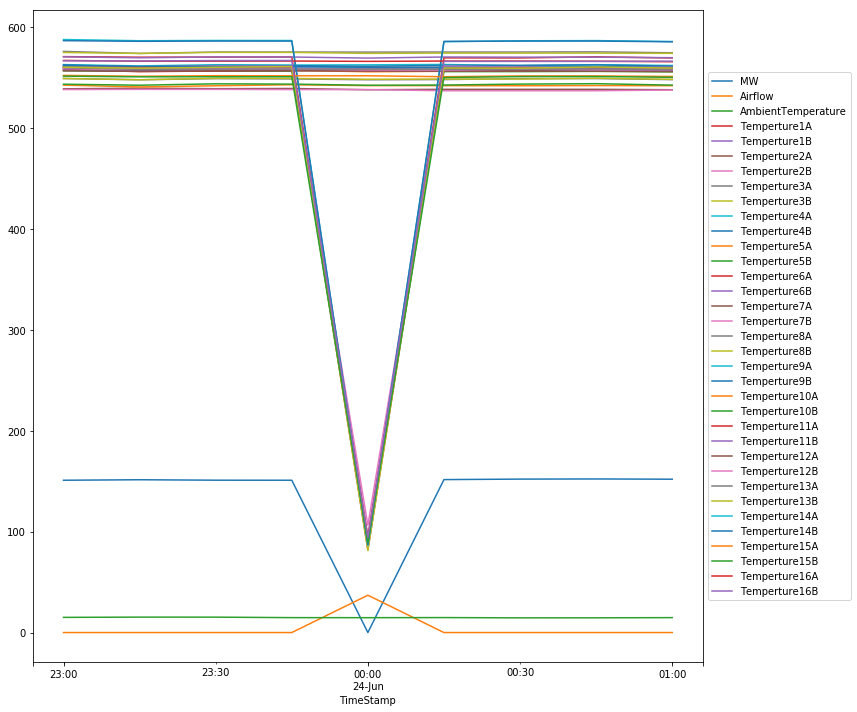

In [73]:
df['2017-06-23 23:00:00':'2017-06-24 01:00:00'].plot(figsize=(12,12))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [74]:
df['2017-06-23 23:30:00':'2017-06-24 01:00:00']

,MW,Airflow,AmbientTemperature,Temperture1A,Temperture1B,Temperture2A,Temperture2B,Temperture3A,Temperture3B,Temperture4A,...,Temperture12A,Temperture12B,Temperture13A,Temperture13B,Temperture14A,Temperture14B,Temperture15A,Temperture15B,Temperture16A,Temperture16B
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2017-06-23 23:30:00,151.02539,0.0,15.269108,570.39966,570.54820,539.08370,538.44104,549.08370,549.36206,562.85130,...,556.6538,558.66473,558.55850,560.322400,586.901600,586.32870,551.97650,550.93830,566.39220,566.97253
2017-06-23 23:45:00,150.97656,0.0,14.790474,570.52480,570.49340,539.29160,538.19390,548.78970,549.29944,562.51825,...,556.6538,558.78986,558.51935,561.016900,586.846860,586.28950,551.88270,550.93830,566.51740,567.05070
2017-06-24 00:00:00,0.00000,37.0,14.740068,95.41367,569.43445,538.06396,538.19390,547.94684,548.47220,562.75260,...,556.7427,557.72330,558.45970,81.183334,86.632385,87.23792,551.89343,89.35737,566.18713,94.20234
2017-06-24 00:15:00,151.61133,0.0,14.840898,569.63760,570.51200,538.45953,537.06476,548.14215,548.62540,563.10126,...,556.5190,557.61676,558.33940,559.620100,585.641360,586.00590,550.97250,550.17645,566.50464,566.15594
2017-06-24 00:30:00,152.09961,0.0,14.563472,569.58777,570.34015,538.45953,537.06476,549.08650,548.62540,561.89100,...,556.8129,558.53010,558.50660,559.416930,586.586700,586.30020,551.76530,551.08960,566.50464,566.15594
2017-06-24 00:45:00,152.24610,0.0,14.605543,570.67804,570.31946,538.45953,537.06476,549.13513,549.49963,562.89496,...,556.5502,557.91864,558.58470,560.621100,586.768430,586.34890,551.74976,551.17737,566.31213,566.15594
2017-06-24 01:00:00,152.00195,0.0,14.790501,569.54395,569.83020,538.06396,537.77783,548.07970,548.36590,562.10210,...,556.0923,558.09550,558.09550,559.526370,585.865230,585.57880,551.22750,550.36896,565.82280,566.39526


In [75]:
df['2017-06-23 23:30:00':'2017-06-24 01:00:00'].describe()

,MW,Airflow,AmbientTemperature,Temperture1A,Temperture1B,Temperture2A,Temperture2B,Temperture3A,Temperture3B,Temperture4A,...,Temperture12A,Temperture12B,Temperture13A,Temperture13B,Temperture14A,Temperture14B,Temperture15A,Temperture15B,Temperture16A,Temperture16B
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,129.994420,5.285714,14.800009,502.255070,570.211123,538.554544,537.68585,548.609103,548.892861,562.587353,...,556.574957,558.191270,558.437679,491.672448,515.034652,514.869989,551.638241,484.863764,566.320134,499.012664
std,57.324369,13.984686,0.230675,179.400836,0.420424,0.471113,0.61268,0.532193,0.474577,0.443631,...,0.235899,0.470786,0.170716,181.009692,188.908294,188.568221,0.382927,174.402327,0.250761,178.504990
min,0.000000,0.000000,14.563472,95.413670,569.434450,538.063960,537.06476,547.946840,548.365900,561.891000,...,556.092300,557.616760,558.095500,81.183334,86.632385,87.237920,550.972500,89.357370,565.822800,94.202340
25%,151.000975,0.000000,14.672805,569.565860,570.074830,538.261745,537.06476,548.110925,548.548800,562.310175,...,556.534600,557.820970,558.399550,559.471650,585.753295,585.792350,551.488630,550.272705,566.249630,566.155940
50%,151.611330,0.000000,14.790474,569.637600,570.340150,538.459530,537.77783,548.789700,548.625400,562.752600,...,556.653800,558.095500,558.506600,559.620100,586.586700,586.289500,551.765300,550.938300,566.392200,566.155940
75%,152.050780,0.000000,14.815700,570.462230,570.502700,538.771615,538.19390,549.085100,549.330750,562.873130,...,556.698250,558.597415,558.538925,560.471750,586.807645,586.314450,551.888065,551.013950,566.504640,566.683895
max,152.246100,37.000000,15.269108,570.678040,570.548200,539.291600,538.44104,549.135130,549.499630,563.101260,...,556.812900,558.789860,558.584700,561.016900,586.901600,586.348900,551.976500,551.177370,566.517400,567.050700


### 3. Major prolonged fluctuation
Sensors showing fluctuations over a prolonged period of time.
Event start time 2017-06-24 21:00:00 
End time 2017-06-26 04:45:00

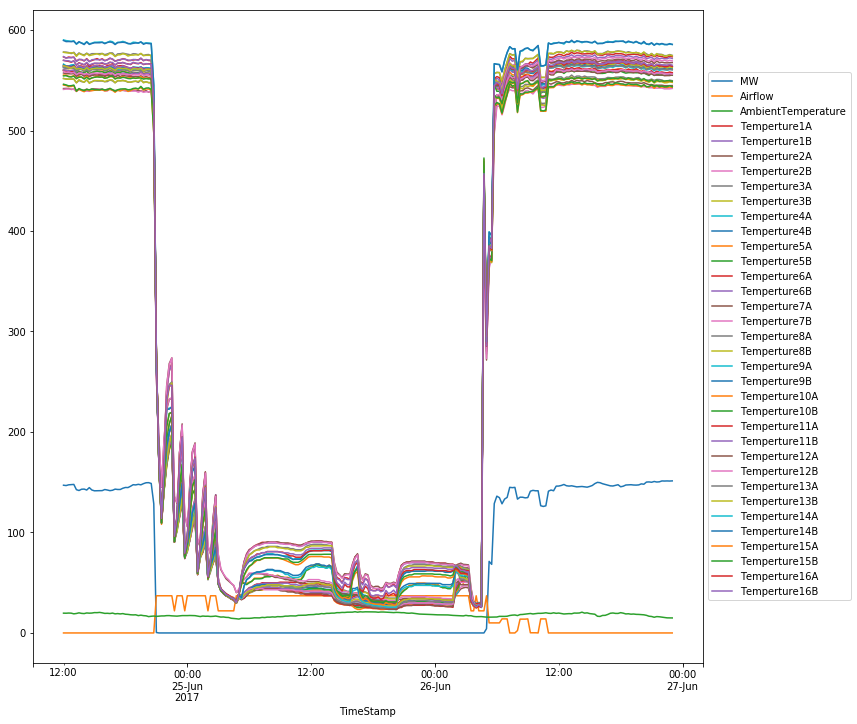

In [77]:
df['2017-06-24 12:00:00':'2017-06-26 23:00:00'].plot(figsize=(12,12))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### 4. Minor fluctuation
Minor dip in sensors.
Event start time - minor dip at 5:30am (2017-06-30 05:30:00) 
until 2017-06-30 05:45:00
Event recovered by 6am

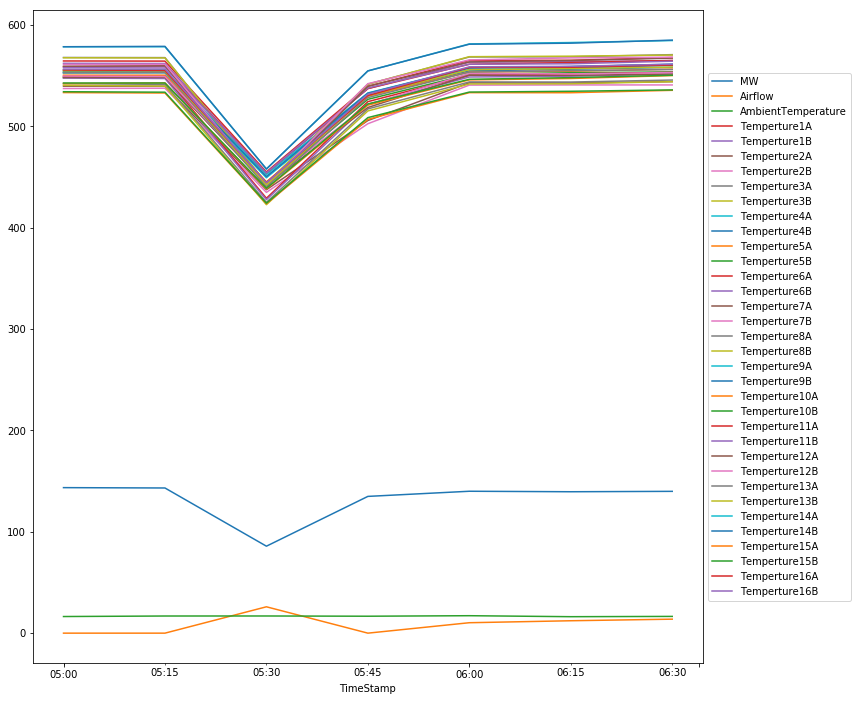

In [79]:
df['2017-06-30 05:00:00':'2017-06-30 06:30:00'].plot(figsize=(12,12))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [81]:
df['2017-06-30 05:00:00':'2017-06-30 06:30:00']

,MW,Airflow,AmbientTemperature,Temperture1A,Temperture1B,Temperture2A,Temperture2B,Temperture3A,Temperture3B,Temperture4A,...,Temperture12A,Temperture12B,Temperture13A,Temperture13B,Temperture14A,Temperture14B,Temperture15A,Temperture15B,Temperture16A,Temperture16B
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2017-06-30 05:00:00,143.554690,0.000000,16.396751,564.48710,562.19745,539.59020,537.30084,542.16565,540.44867,555.61523,...,559.33550,561.05270,552.75354,554.75670,578.51440,578.51440,542.16565,542.73800,555.61523,556.47375
2017-06-30 05:15:00,143.212890,0.000000,16.907219,564.33826,561.99380,539.59020,537.61035,541.36620,539.66486,555.71344,...,559.75903,561.19000,553.11450,554.85490,578.52220,578.88340,542.85547,542.74570,555.11760,556.60330
2017-06-30 05:30:00,85.791016,26.000000,16.932200,455.00912,452.99475,437.43890,434.84323,425.02927,422.71814,452.41913,...,440.32190,441.76300,440.32190,442.33936,457.88602,457.88602,438.30392,438.88052,444.64440,444.35632
2017-06-30 05:45:00,134.912110,0.000000,16.704288,539.51190,537.22253,505.72903,502.57730,517.18540,515.18097,532.92970,...,539.51965,542.08734,528.35030,530.35380,554.67840,554.67840,520.91530,522.05270,530.36160,531.78485
2017-06-30 06:00:00,139.990230,10.290916,17.212393,564.98900,563.27170,542.95374,540.66437,543.81220,541.80900,557.83410,...,563.55800,565.56146,553.54160,555.83093,581.30750,581.02120,545.81530,546.38760,558.12030,558.69275
2017-06-30 06:15:00,139.501950,12.233900,16.237576,565.15000,563.77386,542.85990,540.83320,543.69480,541.97003,558.90857,...,564.91870,567.50256,554.90990,556.90533,582.66907,582.04144,547.17580,548.03424,558.28130,559.19476
2017-06-30 06:30:00,139.892580,13.795572,16.519989,567.85930,564.83234,544.05930,540.83320,545.66656,544.07495,560.99010,...,567.28687,568.24360,555.96840,558.42224,584.63477,585.03880,550.08435,550.37040,560.41770,561.27630


In [82]:
df['2017-06-30 05:00:00':'2017-06-30 06:30:00'].describe()

,MW,Airflow,AmbientTemperature,Temperture1A,Temperture1B,Temperture2A,Temperture2B,Temperture3A,Temperture3B,Temperture4A,...,Temperture12A,Temperture12B,Temperture13A,Temperture13B,Temperture14A,Temperture14B,Temperture15A,Temperture15B,Temperture16A,Temperture16B
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,132.407924,8.902913,16.701488,545.906383,543.755204,521.745896,519.237499,522.702869,520.838089,539.201467,...,542.099950,543.914380,534.137163,536.209037,559.744623,559.723380,526.759399,527.315594,537.508304,538.340290
std,20.753479,9.721592,0.340980,41.240297,41.188155,39.569580,39.698153,44.180105,44.393767,39.418387,...,45.807315,45.911728,42.477723,42.513264,46.035767,46.023675,40.164187,40.101802,42.217572,42.648784
min,85.791016,0.000000,16.237576,455.009120,452.994750,437.438900,434.843230,425.029270,422.718140,452.419130,...,440.321900,441.763000,440.321900,442.339360,457.886020,457.886020,438.303920,438.880520,444.644400,444.356320
25%,137.207030,0.000000,16.458370,551.925080,549.608165,522.659615,519.939070,529.275800,527.422915,544.272465,...,549.427575,551.570020,540.551920,542.555250,566.596400,566.596400,531.540475,532.395350,542.739600,544.129300
50%,139.892580,10.290916,16.704288,564.487100,562.197450,539.590200,537.610350,542.165650,540.448670,555.713440,...,559.759030,561.190000,553.114500,554.854900,578.522200,578.883400,542.855470,542.745700,555.615230,556.603300
75%,141.601560,13.014736,16.919710,565.069500,563.522780,542.906820,540.748785,543.753500,541.889515,558.371335,...,564.238350,566.532010,554.225750,556.368130,581.988285,581.531320,546.495550,547.210920,558.200800,558.943755
max,143.554690,26.000000,17.212393,567.859300,564.832340,544.059300,540.833200,545.666560,544.074950,560.990100,...,567.286870,568.243600,555.968400,558.422240,584.634770,585.038800,550.084350,550.370400,560.417700,561.276300


#### Normal regions
Identified some normal regions (with respect to abnormal regions).
Also important to describe data in normal regions.

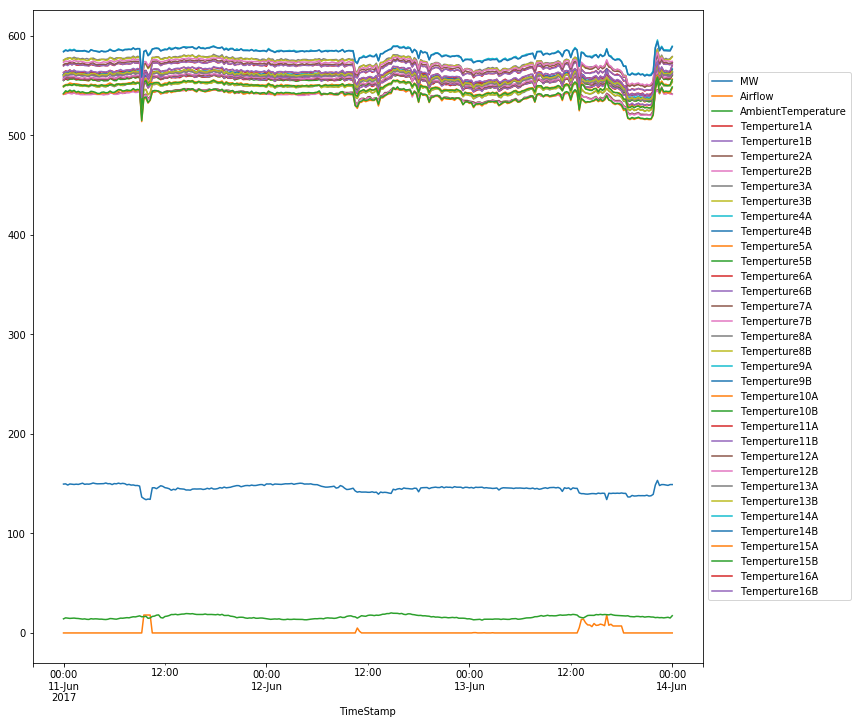

In [84]:
df['2017-06-11 00:00:00':'2017-06-14 00:00:00'].plot(figsize=(12,12))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [85]:
df['2017-06-11 00:00:00':'2017-06-14 00:00:00']

,MW,Airflow,AmbientTemperature,Temperture1A,Temperture1B,Temperture2A,Temperture2B,Temperture3A,Temperture3B,Temperture4A,...,Temperture12A,Temperture12B,Temperture13A,Temperture13B,Temperture14A,Temperture14B,Temperture15A,Temperture15B,Temperture16A,Temperture16B
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2017-06-11 00:00:00,149.51172,0.000000,14.176818,569.57500,569.57500,541.24300,540.95680,548.39700,548.39700,560.98840,...,570.72003,573.01020,560.81660,559.84370,584.17780,583.60490,549.54156,548.96924,562.70560,562.99180
2017-06-11 00:15:00,149.70703,0.000000,15.164263,571.65710,570.76404,542.95230,541.02430,550.05426,550.05426,563.36410,...,571.89343,574.51990,559.87195,562.21140,585.68830,585.09973,550.71460,550.14230,564.50885,563.88666
2017-06-11 00:30:00,148.53516,0.000000,14.882936,570.64984,569.76764,542.95230,542.14060,549.92163,549.75757,562.34920,...,571.79486,573.79880,559.46387,561.49054,584.68030,584.38610,550.90216,550.36110,563.78015,563.75680
2017-06-11 00:45:00,149.60938,0.000000,14.620339,572.37524,571.49300,542.10156,541.80756,550.91000,550.41270,563.49400,...,573.23410,574.65770,561.18884,562.38824,586.12036,585.04970,552.34076,550.69890,565.51320,565.04706
2017-06-11 01:00:00,149.36523,0.000000,14.813577,570.46515,570.67320,543.15240,541.27435,549.78100,550.06710,563.42650,...,572.35180,573.61414,561.14480,562.56790,585.27660,584.70380,551.69320,549.88257,563.59560,564.16800
2017-06-11 01:15:00,149.12110,0.000000,14.922689,571.89905,571.61290,542.14056,542.42160,550.99070,550.94390,563.31195,...,572.75793,575.00140,561.02240,562.15155,586.20120,585.35750,551.27686,551.29254,564.98240,565.26860
2017-06-11 01:30:00,149.41406,0.000000,14.637156,570.31165,570.95170,542.14056,541.24304,549.97626,549.71350,562.01890,...,571.71180,574.12427,559.69037,560.86630,584.82110,584.27170,551.49010,550.20770,563.63464,563.94430
2017-06-11 01:45:00,149.16992,0.000000,14.517420,570.19446,570.97784,542.14056,541.24304,549.92163,549.93720,563.14520,...,572.30480,574.23364,560.49426,561.98770,584.86017,584.22480,551.15710,550.22330,563.67365,563.95990
2017-06-11 02:00:00,149.80469,0.000000,14.262980,570.08500,570.08500,541.46670,540.60815,549.19300,549.19300,562.07080,...,571.51636,573.80664,559.78130,561.49835,584.68810,584.40173,550.62380,550.33765,563.21550,563.78796


In [86]:
df['2017-06-11 00:00:00':'2017-06-14 00:00:00'].describe()

,MW,Airflow,AmbientTemperature,Temperture1A,Temperture1B,Temperture2A,Temperture2B,Temperture3A,Temperture3B,Temperture4A,...,Temperture12A,Temperture12B,Temperture13A,Temperture13B,Temperture14A,Temperture14B,Temperture15A,Temperture15B,Temperture16A,Temperture16B
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,145.338350,0.912587,16.079581,567.160290,567.118857,539.716953,538.980667,546.119553,546.180662,558.678999,...,569.179953,570.985760,556.621301,558.151239,582.052750,581.594256,548.046497,547.552154,560.703063,560.952867
std,3.677643,3.156461,1.825785,6.563277,6.558976,5.606760,5.589895,6.455021,6.428082,6.398190,...,5.920231,5.974548,6.495164,6.568227,6.298544,6.367138,5.978793,5.956134,6.324559,6.434496
min,133.837890,0.000000,12.854051,542.983500,542.697400,519.882900,519.765750,523.204160,522.871000,535.844850,...,547.577640,549.279000,533.555300,535.167970,559.310500,558.118900,526.800500,526.110700,538.134300,537.676300
25%,144.238280,0.000000,14.458544,564.027470,563.704900,537.322600,536.640870,542.756960,542.952300,555.527800,...,566.579960,568.552200,553.423000,554.978760,579.449950,578.814760,545.374270,544.931950,557.704500,558.006500
50%,145.703120,0.000000,15.898207,569.715700,569.744200,541.196170,540.623900,548.522030,548.522030,561.123800,...,571.053300,573.119700,559.110170,560.572300,584.334200,584.003400,550.116700,549.596300,562.898100,563.218300
75%,148.095700,0.000000,17.661419,571.308400,571.269350,542.952300,542.140600,549.976260,550.309200,562.893100,...,572.757930,574.548340,560.796000,562.151550,585.750730,585.357500,551.729400,551.055600,564.540160,564.849730
max,153.222660,18.000000,20.153770,580.917970,580.917970,548.267000,547.512150,559.479400,558.303400,572.042000,...,581.490700,583.209100,570.324340,572.932100,595.560100,594.095700,559.765600,558.303400,574.077330,574.363500


### Summary

At this point we have done some
* data descriptions,
* descriptive statistics and
* some data exploration

## Domain Experts

At this stage the Data Description, Descriptive Statistics and Data Exploration would be presented to the domain experts.

The aim is to find out:

* Does the data look correct? 
 - ie, do the values for the temperature make sense etc. If not, why not? Does this highlight a problem?
 - is there any corruption in the raw data
 - sensor malfunction
 - scenario that was previously unknown, ie we did not know about that. ie cleaning or maintenance.
 - quick that was not known. ie a sensor acted different to expected under certain conditions.


* Check data cleaning logic rules with domain exports
 
* Indicate failures in the data descriptions (or with labels if we had any)
    
* Ask questions about any interesting characteristics in the data found during data exploration.


 - Why do we get a drop in MW? It does seem to correlate with fluctuations.



## Data Cleaning and Validation

Domain experts will inform out cleaning and validation strategy (In practice can be iterated of many data sets).

Using domain exports advice to devise:
* Any logic rules (conversion of units or calculations)
  - Convert units of a reading. Maybe different sensors used at certain time periods.
  
  - Clinical calculation. ie BMI from height and weight
  - Complex calculation. ie level of disease based on readings.
  
* Credibility checks (correctness, accuracy reliable)
  - Incorrectly entered data
  - Missing information
  
* Validation rules (format, length, range checks)
  - Encode MW=0 as missing data?

We can be sure (to a certain degree) that we are working with a clean data set.

## Problem statement

Using the project summary, descriptive statistics and data exploration along with feedback from the domain experts a problem statement can be formulated and defined.

"[] keep the plant up and running and detect any deviations from normal operation as early as possible in order to avoid unplanned downtime, loss of revenue and impact on the stability of the power grid."


## Background: Anomaly Detection Methods

This section provides background into the problem. Relevant literature or interesting approaches or previous work.

Important. If this is a new area for me, I will sometimes take a look at previous work, and perform a few experiments. Which I could present to domain experts.

### What is an Anomaly?

* A single event in data is anomalous if it's too far off from the rest. Fraud detection based on spending.

* Context specific abnormality. This could be seasonal, but otherwise is normal. Spending at holiday times.

* Collective anomalies are a set of events which correspond to an abnormal event. New location and high spending.


### Categories of Data

* Supervised - These approaches requires a data set that has been labelled with some indication of normal and abnormal. The solution would involve training and testing a model, then prediction on new data.

* Semi-supervised - These approach have a small amount of labelled data. This could be a sample of labels indicating normal or abnormal. This can be used for training and evaluation.

* Unsupervised - These approaches use unlabelled data. The assumption is that the majority indicates normal activity. 


### Possible Approaches for Anomaly Detection

* Statistical Methods
 - Moving average (low pass filter)
   Assume mean is normal behaviour, deviation from the mean is an abnormal event.

* Density-Based Anomaly Detection 
 - K-nearest neighbour algorithm
   Assume nearest (euclidean distance) set of data points are normal, otherwise abnormal

* Clustering-Based Anomaly Detection
 - K-means clustering algorithm
   Data that falls outside of these clusters could be considered abnormal

* Support Vector Machine-Based Anomaly Detection
 - Typically used in supervised learning. But one class SVM is very well suited to anomaly detection.




### Support Vector Machine (SVM)

Support vectors are the individual instances (of n-dimension) in the feature space. The support vector machine is the frontier (line) which best segments the instances in this feature space.

There are many possible frontiers which can segment instances. 
The objective function
 - will first find all the frontiers that segment the classes which 
   have the minimum distance to a certain class.
 - Then it will select the single frontiers that has the maximum distance 
   from each of the classes.

Kernels
* Linear SVM
* Non-linear 


#### Robust to Outliers

SVM are said to be robust to outliers.

If we use the example of dots on one side, and stars on the other.
We can use SVM to draw a decision boundary between the dots and stars segmenting into two classes.

If we swap a star and a dot. A SVM can still work out the correct decision boundary to segment these two classes correctly. It will assume that the swapped star and dots are outliers. And they will not adversely effect the decision boundary.


### One Class SVM

One Class SVM is an unsupervised algorithm that learns a decision function (boundary) by classifying training data as either part of a single class, or an outlier.

The algorithm will try to create a decision boundary to classify the majority of the training data, while at the same time determining which data (if any), are outliers.

This makes the OneClassSVM a good algorithm in practice for novelty detection.


## Proposed Solution

Given the nature of problem and the data set, I proposed an unsupervised anomaly detection solution using One class SVM. 

* Suitability to the anomaly detection problem
* Nature of the unsupervised power plant data set
* Past experience of using this algorithm in this setting



## Implementation

One class SVM using the sklearn library in python.

In [89]:
import pandas as pd
import numpy as np

from sklearn import svm
from sklearn import preprocessing

# Read PowerPlant Data
df = pd.read_csv("data/PowerPlant.txt", sep='\t')
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
df.set_index(df['TimeStamp'],inplace=True)
del df['TimeStamp']

### Data Preprocessing

Pre-Process data into representation suitable for machine learning algorithm.
Transformations applied:
 * Centre Data - use zero mean to centre features
 * Scale Data  - dividing features by their standard deviation
 
Objective is to create data that is somewhat normally distributed.

If a feature has a variance that is orders of magnitude larger than others, then it could dominate the objective function in the learning algorithm. This could make it unable to learn from other features correctly as expected.


#### Further data preprocessing techniques

Feature selection to discover important of features

* Principal Component Analysis (PCA) to reduce dimensionality.
* Information gain

The descriptive statistics and data exploration did reveal to me that there is most likely a reduction in dimensionality of this feature space. 

What this means in real terms. A group of sensors seem to have the same readings and range. Adding multiple of these sensors does not add any new information. Only potentially extra complexity in the modelling stage.

In [91]:
# Data PreProcessing
npArray = df.values
ss_ = preprocessing.StandardScaler(with_mean=True,with_std=True)
X_train = ss_.fit_transform(npArray)

### Training Model

The OneClassSVM model is fit to the preprocessed data using params:
 * Radial Basis Function (rbf) kernel - Non-linear kernel
   - gamma - defines how much influence a single data instance has. The larger gamma value the closer other examples must be to be affected.
   - nu - regularization parameter. 
        At most n% of training misclassified.
	    At least n% of training examples being support vectors.


In [92]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

### Results

#### OneClassSVM predictions

The resulting model and how it fits the input data is investigated by first looking at its predictions.

We can think of these values as the 'contamination' ratio of abnormal events.

In [93]:
# Predict classifcation on input data
y_pred_train = clf.predict(X_train)

# get number of classified as normal=1 or abnormal=-1
n_normal_train   = y_pred_train[y_pred_train == 1].size
n_abnormal_train = y_pred_train[y_pred_train == -1].size

# get the distance of each instance from the decision boundary (as determined by the kernel)
decisionFunctionAll = clf.decision_function(X_train)

print(" Total instances = "+str(df.shape[0]) )
print("  Normal         = "+str(n_normal_train) )
print("  Abnormal       = "+str(n_abnormal_train) )

 Total instances = 1920
  Normal         = 1729
  Abnormal       = 191


#### OneClassSVM predictions vs input data

The model predictions are then compared to input data visually for interpretation.

##### Input data (subset)

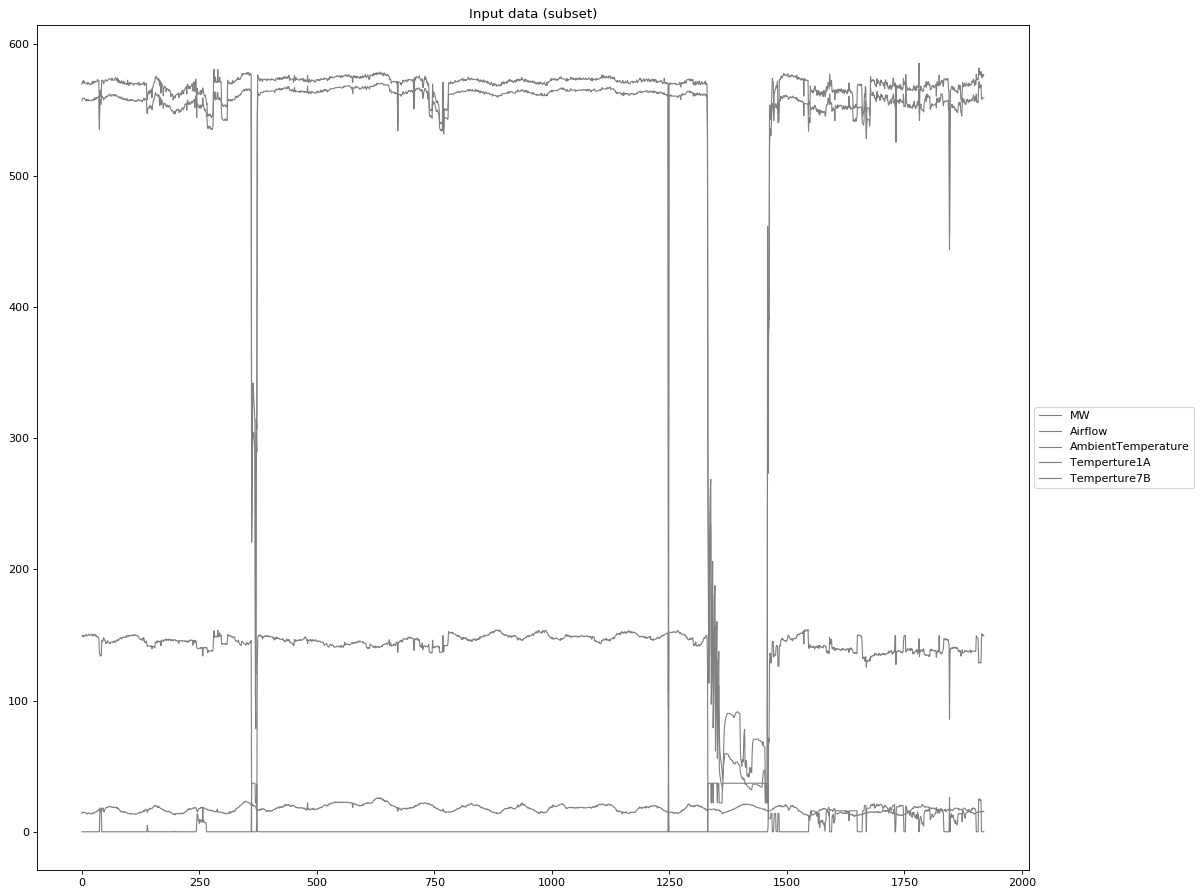

In [30]:
import matplotlib.pyplot as plt
import matplotlib.font_manager

fig=plt.figure(figsize=(16, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.title("Input data (subset)")
s = 10
colorData="gray"
df2 = plt.plot(range(0,df.shape[0]), df['MW'], color=colorData, linewidth=1)
df3 = plt.plot(range(0,df.shape[0]), df['Airflow'], color=colorData, linewidth=1)
df4 = plt.plot(range(0,df.shape[0]), df['AmbientTemperature'], color=colorData, linewidth=1)
df5 = plt.plot(range(0,df.shape[0]), df['Temperture1A'], color=colorData, linewidth=1)
df6 = plt.plot(range(0,df.shape[0]), df['Temperture7B'], color=colorData, linewidth=1)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

##### Input data + Predictions (blue bar=Normal, red bar=Abnormal)

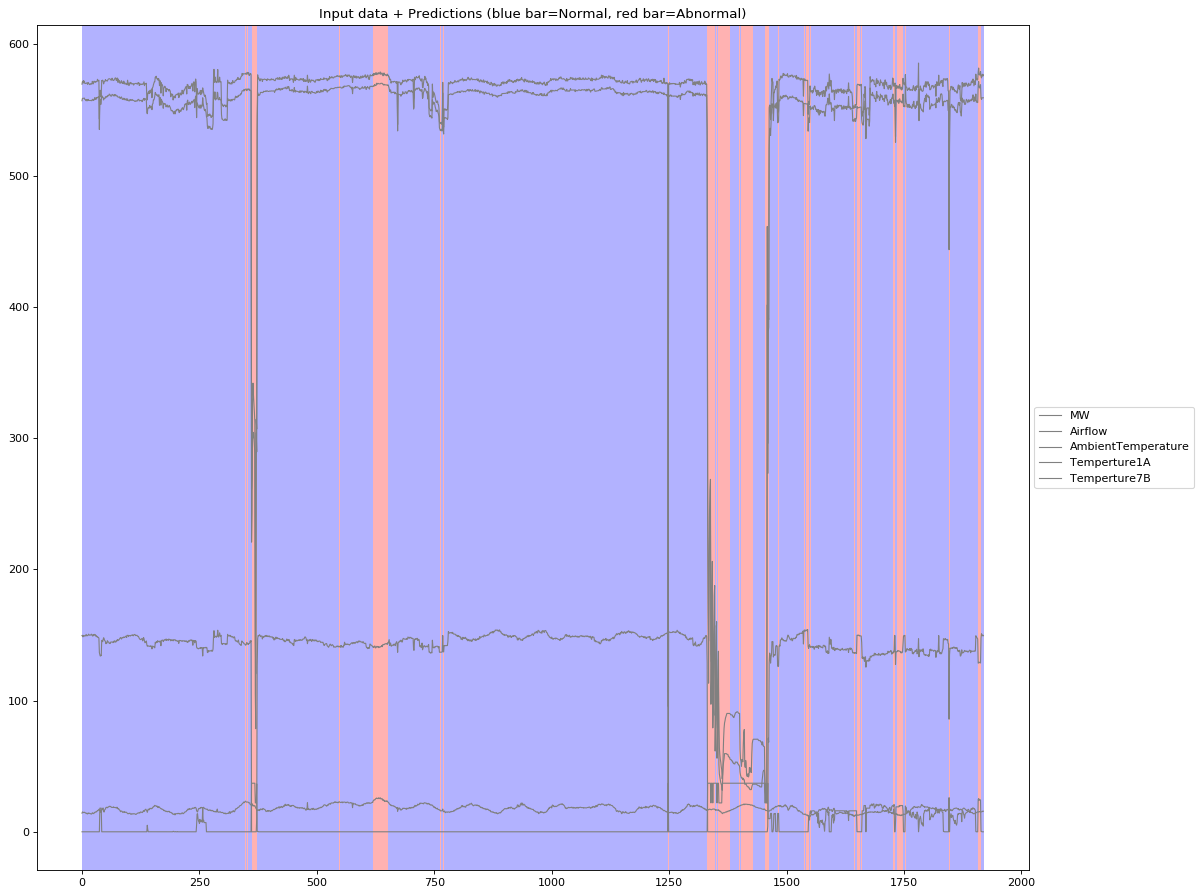

In [32]:
fig=plt.figure(figsize=(16, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.title("Input data + Predictions (blue bar=Normal, red bar=Abnormal)")
s = 10
colorData="gray"
df2 = plt.plot(range(0,df.shape[0]), df['MW'], color=colorData, linewidth=1)
df3 = plt.plot(range(0,df.shape[0]), df['Airflow'], color=colorData, linewidth=1)
df4 = plt.plot(range(0,df.shape[0]), df['AmbientTemperature'], color=colorData, linewidth=1)
df5 = plt.plot(range(0,df.shape[0]), df['Temperture1A'], color=colorData, linewidth=1)
df6 = plt.plot(range(0,df.shape[0]), df['Temperture7B'], color=colorData, linewidth=1)

for i in range(0,len(y_pred_train)):
	if y_pred_train[i]==1:
		plt.axvspan(i, i+1, facecolor='b', alpha=0.3)
	else:
		plt.axvspan(i, i+1, facecolor='r', alpha=0.3)
	

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

##### Input data + Predictions +  OneClassSVM (nu=0.1, kernel=rbf, gamma=0.1)

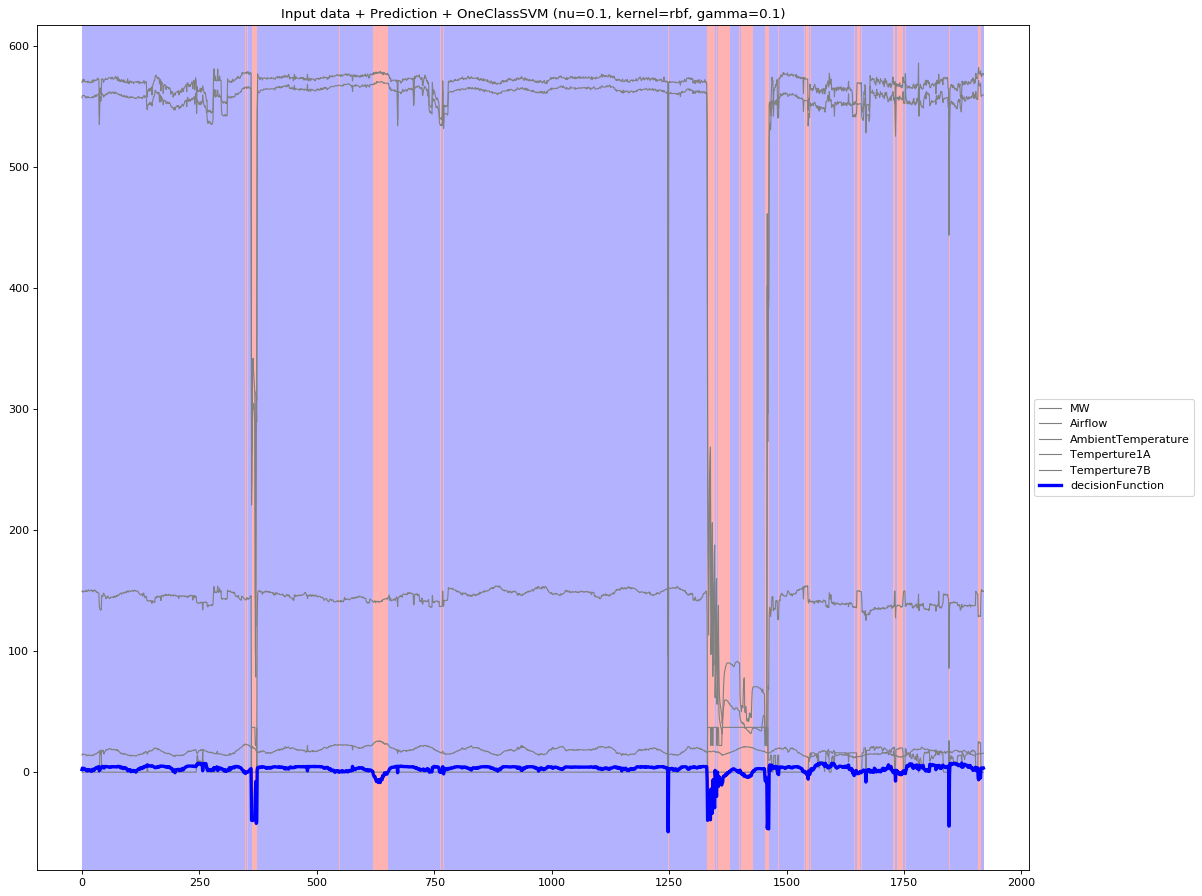

In [33]:
fig=plt.figure(figsize=(16, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.title("Input data + Prediction + OneClassSVM (nu=0.1, kernel=rbf, gamma=0.1)")
s = 10
colorData="gray"
df2 = plt.plot(range(0,df.shape[0]), df['MW'], color=colorData, linewidth=1)
df3 = plt.plot(range(0,df.shape[0]), df['Airflow'], color=colorData, linewidth=1)
df4 = plt.plot(range(0,df.shape[0]), df['AmbientTemperature'], color=colorData, linewidth=1)
df5 = plt.plot(range(0,df.shape[0]), df['Temperture1A'], color=colorData, linewidth=1)
df6 = plt.plot(range(0,df.shape[0]), df['Temperture7B'], color=colorData, linewidth=1)
dfAll = plt.plot(range(0,df.shape[0]), decisionFunctionAll, label='decisionFunction', color='blue', linewidth=3)

for i in range(0,len(y_pred_train)):
	if y_pred_train[i]==1:
		plt.axvspan(i, i+1, facecolor='b', alpha=0.3)
	else:
		plt.axvspan(i, i+1, facecolor='r', alpha=0.3)
	

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Disclaimer: This model is not the worlds best model, nor have the parameters been optimised as such.

The plots above are an illustration of how:
* we can translate the complexities of a machine learning model back to the real input data
* the the predictions (blue bar=Normal, red bar=Abnormal) correspond to events in the input data
* the decision function (determined by the OneClassSVM) related to predictions and its variance (<0=Abnormal).

### Evaluation 

What has been shown above is a way to look at how the model has performed. 

I now look at formal methods to evaluate the performance of the proposed model.


Problem with performance metrics in this domain:
* anomaly events maybe rare
* anomaly events maybe of unknown type
* anomaly detection is an unbalanced class problem
* little or no data labels

There are two possible solutions to the evaluation problem:
* Create synthetic data with labelling
* Make your own labels and test against them

In this work I propose to make my own labelling (you will notice I already did this in the data description stage). 
I then use metrics (typically used for classification) to measure the performance of the model.

#### Model evaluation using data labels

The first step is to label the data as normal and abnormal. I do this using the results of my data description investigation.

In [94]:
# Create labels for powerplant data (normal=1 abnormal=-1)
df['Labels'] = pd.Series([1 for x in range(len(df.index))], index=df.index)

# Event 1
df.loc['2017-06-14 18:00:00':'2017-06-14 21:15:00','Labels'] = -1

# Event 2
df.loc['2017-06-23 23:45:00':'2017-06-24 00:15:00','Labels'] = -1

# Event 3
df.loc['2017-06-24 21:00:00':'2017-06-26 04:45:00','Labels'] = -1

# Event 4
df.loc['2017-06-30 05:30:00':'2017-06-30 05:45:00','Labels'] = -1


# predicted labels
y_pred = y_pred_train

# true labels (as per my interpretation!)
y_true = df['Labels'].values

#
normalNumber = y_true[y_true == 1].size
abnormalNumber = y_true[y_true == -1].size


In [ ]:
We can then use a variety of standard metrics to evaluation the performance of the model.

In [95]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

accuracyScore = accuracy_score(y_true, y_pred) 
precisionScore = precision_score(y_true, y_pred)
recallScore = recall_score(y_true, y_pred)
f1Score = f1_score(y_true, y_pred)
rocScore = roc_auc_score(y_true, y_pred)

print(" Total instances  = "+str(df.shape[0]) )
print("  Normal (true)   = "+str(normalNumber) )
print("  Abnormal (true) = "+str(abnormalNumber) )
print
print("  Normal (predict)   = "+str(n_normal_train) )
print("  Abnormal (predict) = "+str(n_abnormal_train) )
print
print("  AccuracyScore  = "+str(accuracyScore) )
print("  PrecisionScore = "+str(precisionScore) )
print("  RecallScore    = "+str(recallScore) )
print("  F1Score        = "+str(f1Score) )
print("  RocScore       = "+str(rocScore) )

 Total instances  = 1920
  Normal (true)   = 1773
  Abnormal (true) = 147

  Normal (predict)   = 1729
  Abnormal (predict) = 191

  AccuracyScore  = 0.9197916666666667
  PrecisionScore = 0.9681897050318103
  RecallScore    = 0.9441624365482234
  F1Score        = 0.9560251284980013
  RocScore       = 0.7850063883421389


What each of these metrics are telling us.

* Accuracy: Overall, how often is the classifier correct?
* Precision: When it predicts yes, how often is it correct?
* F Score: This is a weighted average of the true positive rate (recall) and precision.
* ROC Curve: Summarizes the performance of a classifier over all possible thresholds. 

Imbalance of labels to consider when interpreting the metrics.

I want to focus on an important aspect in this particular domain which can be interpreted by using the confusion matrix from this models classification of input data.

Confusion matrix, without normalization


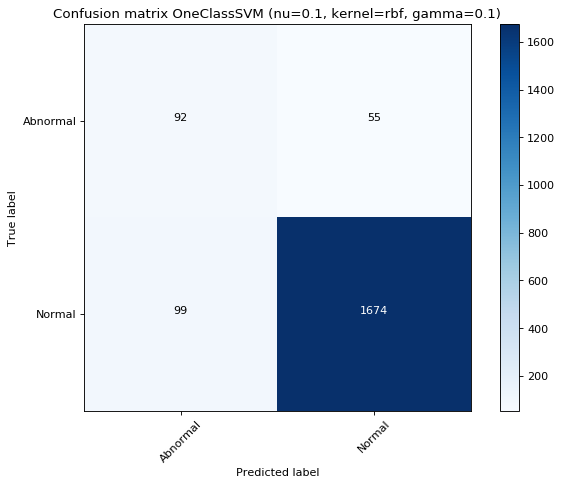

In [48]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
# Calculate confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure()
fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
class_names=['Abnormal','Normal']
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix OneClassSVM (nu=0.1, kernel=rbf, gamma=0.1)')
plt.show()

In [39]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print("   tn= "+str(tn) )
print("   fp= "+str(fp) )
print("   fn= "+str(fn) )
print("   tp= "+str(tp) )

   tn= 92
   fp= 55
   fn= 99
   tp= 1674


#### Confusion Matrix 

* True positives (tp): Model predicted abnormal but was normal
* True negatives (tn): Model predicted normal correctly

* false positives (fp): Model predicted normal, but was abnormal (Type II error)
* false negatives (fn): Model predicted abnormal, but was normal (Type I error)

#### Importance of Type II Errors

It is acknowledged that no computational model or algorithm can be 100% accurate all of the time.

An important aspect for the proposed model is the trade off between Type I and Type II errors. 

In this particular scenario we do not want to miss-classify a (critical) abnormal event as normal. Therefore we would want to 'tune' the algorithm accordingly.

This should provide us with a model in which Type II errors are tolerated in order to catch all potentially dangerous abnormal events.

## Toy Early Warning Detection System

The code below is a toy example of how an early warning detection system could be implemented. This system uses the OneClassSVM model to fit the input data and detect anomalies. It then use this model and a user defined threshold
to determine if a new data instance is abnormal or not and to what degree.


In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn import preprocessing 

# Read PowerPlant data
df = pd.read_csv("data/PowerPlant.txt", sep='\t')
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
df.set_index(df['TimeStamp'],inplace=True)
del df['TimeStamp']

# Normalise data
npArray = df.values
ss_ = preprocessing.StandardScaler(with_mean=True,with_std=True)
X_scaled = ss_.fit_transform(npArray)

# Fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_scaled)

# Set thershold levels
lowWarning=-4.0
mediumWarning=-8.0
highWarning=-10.0

for i in range(0,len(X_scaled)):
	# read new instance
	rowDF = df.iloc[i]	
	out=""+str(rowDF.name)+" "

	# get prediction for new instance
	if clf.predict(X_scaled[i].reshape(1, -1))[0] == 1:
		out=out+"Normal "
	else:
		# get distance of current reading to model decision boundary
		testDecisionFunction = clf.decision_function( X_scaled[i].reshape(1, -1) )
		out=out+"Abnormal ("+str(testDecisionFunction[0][0])+") "

		# determine warning level
		if testDecisionFunction[0][0] > lowWarning: out=out+"Low Warning!"
		elif testDecisionFunction[0][0] > mediumWarning: out=out+"Medium Warning!!"
		elif testDecisionFunction[0][0] > highWarning: out=out+"High Warning!!!"
		else: out=out+"Critical!!!"
	print(out)

#  Selected Output

#### Example: Small spike

2017-06-13 01:00:00 Normal <br/>
2017-06-13 01:15:00 Normal <br/>
2017-06-13 01:30:00 Abnormal (-0.4883898324369156) Low Warning! <br/>
2017-06-13 01:45:00 Normal <br/>
2017-06-13 02:00:00 Normal <br/>

#### Example: Escalating warning levels

2017-06-17 10:30:00 Normal <br/>
2017-06-17 10:45:00 Normal <br/>
2017-06-17 11:00:00 Abnormal (-1.713211014203921) Low Warning! <br/>
2017-06-17 11:15:00 Abnormal (-2.6012780830166307) Low Warning! <br/>
2017-06-17 11:30:00 Abnormal (-3.7745073279804444) Low Warning! <br/>
2017-06-17 11:45:00 Abnormal (-3.4689648957383312) Low Warning! <br/>
2017-06-17 12:00:00 Abnormal (-3.816489565535697) Low Warning! <br/>
2017-06-17 12:15:00 Abnormal (-5.946031858579197) Medium Warning!! <br/>
2017-06-17 12:30:00 Abnormal (-6.575669107907494) Medium Warning!! <br/>
2017-06-17 12:45:00 Abnormal (-7.774132768041703) Medium Warning!! <br/>
2017-06-17 13:00:00 Abnormal (-6.712997173845061) Medium Warning!! <br/>
2017-06-17 13:15:00 Abnormal (-6.606271771662811) Medium Warning!! <br/>
2017-06-17 13:30:00 Abnormal (-6.433806274950982) Medium Warning!! <br/>
2017-06-17 13:45:00 Abnormal (-8.577912822244265) High Warning!!! <br/>
2017-06-17 14:00:00 Abnormal (-6.403362770820955) Medium Warning!! <br/>
2017-06-17 14:15:00 Abnormal (-6.351860361820528) Medium Warning!! <br/>
2017-06-17 14:30:00 Abnormal (-7.953127325688186) Medium Warning!! <br/>
2017-06-17 14:45:00 Abnormal (-8.53646009433698) High Warning!!! <br/>
2017-06-17 15:00:00 Abnormal (-5.7401220288735) Medium Warning!! <br/>
2017-06-17 15:15:00 Abnormal (-5.520689558120111) Medium Warning!! <br/>
2017-06-17 15:30:00 Abnormal (-6.200828795440607) Medium Warning!! <br/>
2017-06-17 15:45:00 Abnormal (-6.265127126213244) Medium Warning!! <br/>
2017-06-17 16:00:00 Abnormal (-2.908596802214575) Low Warning! <br/>
2017-06-17 16:15:00 Abnormal (-3.9769445779516275) Low Warning! <br/>
2017-06-17 16:30:00 Abnormal (-2.5595056361885824) Low Warning! <br/>
2017-06-17 16:45:00 Abnormal (-2.868124294077248) Low Warning! <br/>
2017-06-17 17:00:00 Abnormal (-0.6137912139521049) Low Warning! <br/>
2017-06-17 17:15:00 Abnormal (-1.67508089020383) Low Warning! <br/>
2017-06-17 17:30:00 Abnormal (-1.0236988075665607) Low Warning! <br/>
2017-06-17 17:45:00 Abnormal (-1.1565361122721) Low Warning! <br/>
2017-06-17 18:00:00 Abnormal (-0.6426051202003435) Low Warning! <br/>
2017-06-17 18:15:00 Abnormal (-1.67236571939074) Low Warning! <br/>
2017-06-17 18:30:00 Abnormal (-1.1537559391425347) Low Warning! <br/>
2017-06-17 18:45:00 Abnormal (-0.0704779854887505) Low Warning! <br/>
2017-06-17 19:00:00 Normal <br/>
2017-06-17 19:15:00 Normal <br/>



## Conclusion

This work evaluates the OneClassSVM model for the unsupervised anomaly detection in the context of a power plant early warning detection system. 


## Further Reading / References

Chandola et al's (2009)
Anomaly Detection: A Survey
https://www-users.cs.umn.edu/~baner029/papers/09/anomaly.pdf

Ted Dunning and Ellen Friedman (2014)
Practical machine learning: a new look at anomaly detection pdf
http://info.mapr.com/rs/mapr/images/Practical_Machine_Learning_Anomaly_Detection.pdf
